# ***POLYNOMIAL REGRESSION***

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ***Training***

In [2]:
# Sigmoid Function
def SigmoidFunction(X):
  return 1/(1+np.exp(-X))

In [3]:
# Normalize Function
def NormalizeTrain(X):
  AverageList = []
  StdDevList = []

  for i in range(X.shape[1]):
    Average = np.mean(X[:,i])
    AverageList.append(Average)
    StdDev  = np.std(X[:,i])
    StdDevList.append(StdDev)
    X[:,i] = (X[:,i] - Average)/StdDev
  
  return X, AverageList, StdDevList


def NormalizeTest(X, AverageList, StdDevList):
  for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - AverageList[i])/StdDevList[i]
  
  return X

In [4]:
# Function To Add Higher Degree Features 
def ConvertToPoly(X, degree):
  A, B, C = np.array([X[:,0]]), np.array([X[:,1]]), np.array([X[:,2]])
  A, B, C = A.T, B.T, C.T

  X_poly = np.ones((X.shape[0],1))

  for i in range(degree):
    X_poly = np.concatenate((X_poly, A**(i+1)), axis=1)
  for i in range(degree):
    X_poly = np.concatenate((X_poly, B**(i+1)), axis=1)
  for i in range(degree):
    X_poly = np.concatenate((X_poly, C**(i+1)), axis=1)

  return X_poly


In [5]:
# Cost Function
def Cost(X, Y, theta):
  cost = (1/(2*(X.shape[0])))*(np.sum((np.dot(X, theta) - Y)**2))
  return cost

In [6]:
# Polynomial Regression Function
def Predict(X, theta):
  return np.dot(X, theta)

# Normal Equation
def PolynomialRegressionTraining_N(X, Y):
  return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), Y)

# Gradient Descent
def PolynomialRegressionTraining_G(X, Y, theta, LearningRate, Iterations):
  m = Y.size
  CostList  = []

  for i in range(Iterations):
    Y_Predicted = Predict(X, theta)
    cost = Cost(X, Y, theta)
    CostList.append(cost)
    
    d_theta = (np.dot(X.T, Y_Predicted - Y) / m)
    theta = theta - LearningRate*d_theta

  return theta, CostList

In [7]:
# Impoting Data
TrainingData = pd.read_csv('drive/MyDrive/Colab Notebooks/Polynomial_train.csv')
TrainingData.pop('Unnamed: 0')
TrainingData

,X,Y,Z,label
0,0.643715,-9.866550,-5.836019,307.972927
1,-1.366446,-3.761945,-8.756162,136.398375
2,-4.090270,-1.836218,-1.846066,-310.724813
3,-8.730478,-1.923651,3.892972,1.755447
4,5.367169,0.358357,6.703989,-343.582590
...,...,...,...,...
49995,2.693877,-1.362685,-7.392968,683.405727
49996,-9.270188,-5.456920,-2.343480,-1874.385403
49997,6.616753,-2.847288,-0.504040,663.873655
49998,3.558199,4.507526,-4.823674,-421.004005


In [8]:
# Initializing X and Y
X = np.array(TrainingData.drop('label', axis=1))
Y = np.array([TrainingData['label']]).T

print('X Shape : ', X.shape)
print(X)
print('\nY Shape : ', Y.shape)
print(Y)

X Shape :  (50000, 3)
[[ 0.64371517 -9.86655011 -5.8360194 ]
 [-1.36644585 -3.76194541 -8.75616193]
 [-4.09026967 -1.83621751 -1.84606561]
 ...
 [ 6.6167532  -2.84728822 -0.50404002]
 [ 3.55819907  4.50752592 -4.8236737 ]
 [ 0.62343079  8.86323404 -3.2310397 ]]

Y Shape :  (50000, 1)
[[ 307.9729269 ]
 [ 136.39837542]
 [-310.72481348]
 ...
 [ 663.87365546]
 [-421.00400451]
 [-699.71868166]]


In [9]:
# Conc=verting X to Desired Format
X_poly = ConvertToPoly(X, 3)
X_poly[:,1:], AverageList, StdDevList = NormalizeTrain(X_poly[:,1:])

print('X_poly Shape : ', X_poly.shape)
print(X_poly)

X_poly Shape :  (50000, 10)
[[ 1.          0.10575436 -1.0854563  ... -1.01046228  0.01896586
  -0.52628642]
 [ 1.         -0.24273623 -1.03746442 ... -1.51503783  1.4471758
  -1.77235638]
 [ 1.         -0.71495063 -0.54647658 ... -0.32103254 -1.00837547
  -0.01875886]
 ...
 [ 1.          1.14126721  0.34712847 ... -0.08914204 -1.11408545
  -0.00250756]
 [ 1.          0.61102245 -0.68090905 ... -0.83553764 -0.34272816
  -0.29811519]
 [ 1.          0.10223777 -1.08630538 ... -0.56034416 -0.77269391
  -0.09111142]]


In [10]:
# Calculating Theta Using Normal Equation
thetaN = PolynomialRegressionTraining_N(X_poly, Y)

print('thetaN Shape : ', thetaN.shape)
print(thetaN)

cost = Cost(X_poly, Y, thetaN)
print('Minimized Cost : ', cost)

thetaN Shape :  (10, 1)
[[  13.25752212]
 [  15.0124059 ]
 [  39.20814786]
 [  -7.49376563]
 [  -5.09867566]
 [-143.41321066]
 [   3.47890492]
 [ -18.51255628]
 [ 123.04041764]
 [  22.77383522]]
Minimized Cost :  708253.5672270329


In [11]:
# Randomly Initializing theta
thetaG = np.zeros((X_poly.shape[1], 1))
print('thetaG Shape : ', thetaG.shape)
print(thetaG)

thetaG Shape :  (10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [12]:
# Calculating Theta Using Gradient Descent
Iterations = 2000
LearningRate = 1
thetaG, CostListG = PolynomialRegressionTraining_G(X_poly, Y, thetaG, LearningRate, Iterations)

print('thetaG shape : ', thetaG.shape)
print(thetaG)

thetaG shape :  (10, 1)
[[  13.25752212]
 [  15.0124059 ]
 [  39.20814786]
 [  -7.49376563]
 [  -5.09867566]
 [-143.41321066]
 [   3.47890492]
 [ -18.51255628]
 [ 123.04041764]
 [  22.77383522]]


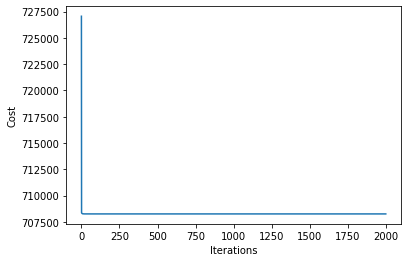


Initial Cost   :  727060.5592130942
Minimized Cost :  708253.5672270329


In [13]:
# Minimized Cost and Graph
rng = np.arange(0, Iterations)
plt.plot(rng, CostListG)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print('\nInitial Cost   : ', CostListG[0])
cost = Cost(X_poly, Y, thetaG)
print('Minimized Cost : ', cost)

In [14]:
# Predicting Training Labels
Y_Predicted_N = np.dot(X_poly, thetaN)
Y_Predicted_G = np.dot(X_poly, thetaG)
Compare = np.concatenate((Y, Y_Predicted_N, Y_Predicted_G), axis=1)

print('[[  EXPECTED   :   PREDICTED(N)   :  PREDICTED(G) ]]')
print(Compare)

[[  EXPECTED   :   PREDICTED(N)   :  PREDICTED(G) ]]
[[ 307.9729269  -324.49505905 -324.49505905]
 [ 136.39837542  230.495595    230.495595  ]
 [-310.72481348    9.90050146    9.90050146]
 ...
 [ 663.87365546   27.67588622   27.67588622]
 [-421.00400451   21.72611686   21.72611686]
 [-699.71868166 -331.69231924 -331.69231924]]


## ***Testing***

In [15]:
# Importing Testing Data
TestingData = pd.read_csv('drive/MyDrive/Colab Notebooks/Polynomial_test.csv')
TestingData.pop('Unnamed: 0')
TestingData

,X,Y,Z,label
0,9.322078,0.413096,5.984731,-657.669309
1,2.811964,6.142752,6.419237,-545.362524
2,-2.669784,7.775091,-6.931907,-75.044187
3,-6.992156,-9.205548,0.852580,-2403.124902
4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...
9995,-0.992449,-7.853677,7.748156,-635.006038
9996,8.574451,6.271919,-5.734962,-1275.855209
9997,6.640997,6.864877,4.511685,-1771.640694
9998,-6.262414,1.323203,-3.917748,-22.746921


In [16]:
# Initializing X_test and Y_test
X_test = np.array(TestingData.drop('label', axis=1))
Y_test = np.array([TestingData['label']]).T
print('X_test Shape : ', X_test.shape)
print(X_test)
print('\nY_test Shape : ', Y_test.shape)
print(Y_test)

X_test Shape :  (10000, 3)
[[ 9.32207776  0.41309646  5.98473071]
 [ 2.81196379  6.14275187  6.41923694]
 [-2.66978441  7.77509088 -6.93190696]
 ...
 [ 6.64099656  6.86487708  4.51168542]
 [-6.26241442  1.3232032  -3.91774828]
 [ 8.28979179 -0.37154051  2.09903937]]

Y_test Shape :  (10000, 1)
[[ -657.66930949]
 [ -545.36252395]
 [  -75.04418664]
 ...
 [-1771.64069421]
 [  -22.74692118]
 [  -64.85344575]]


In [17]:
# Converting X_test to Desired Format
X_test_poly = ConvertToPoly(X_test, 3)
X_test_poly[:,1:] = NormalizeTest(X_test_poly[:,1:], AverageList, StdDevList)

print('X_test_poly Shape : ', X_test_poly.shape)
print(X_test_poly)

X_test_poly Shape :  (10000, 10)
[[ 1.          1.6102745   1.77154253 ...  1.0320618   0.07788505
   0.56304227]
 [ 1.          0.48165174 -0.83794053 ...  1.10714074  0.25852942
   0.69530387]
 [ 1.         -0.46868889 -0.8636869  ... -1.19982224  0.48794567
  -0.88045566]
 ...
 [ 1.          1.14547015  0.35774599 ...  0.77753223 -0.44034778
   0.23998546]
 [ 1.         -1.09152346  0.19637515 ... -0.67900151 -0.60815346
  -0.16072757]
 [ 1.          1.43131274  1.1709694  ...  0.36064771 -0.97492503
   0.02221603]]


In [18]:
# Predicting Test Labels
Y_test_Predicted_N = np.dot(X_test_poly, thetaN)
Y_test_Predicted_G = np.dot(X_test_poly, thetaG)
Compare = np.concatenate((Y_test, Y_test_Predicted_N, Y_test_Predicted_G), axis=1)

print('[[  EXPECTED   :   PREDICTED(N)   :  PREDICTED(G) ]]')
print(Compare)

[[  EXPECTED   :   PREDICTED(N)   :  PREDICTED(G) ]]
[[ -657.66930949   255.65091617   255.65091617]
 [ -545.36252395    -8.94841958    -8.94841958]
 [  -75.04418664   -96.58109587   -96.58109587]
 ...
 [-1771.64069421   -91.8855374    -91.8855374 ]
 [  -22.74692118    94.16147995    94.16147995]
 [  -64.85344575   105.02809414   105.02809414]]
